# Introduction

### Headers
- Benchmark Name
- Total Depenedencies
- Dependencies Ratio
- Realizable (If one of the tools claims for realizability)
- (Tool name) Duration
- (Tool name) Status (ERROR | COMPLETED | TIMEOUT)

### Tools
 - Deps Synthesis (Synthesis 2 strategies: dependents, indepenents)
 - Spot Hijack (Don't find deps + don't eject)
 - Indep Synthesis (Synhesis a strategy only for independents, i.e., remove dependents from specification)
 - Spot Split-Determinstic (SD)
 - Spot LAR
 - Spot PS
 - Strix

### Sanity Check
- Realizability is similar in all tools

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
import os.path
from pathlib import Path
import json
import re

In [17]:
def seconds_to_ms(secs):
    return secs * 1000

TIMEOUT_MS = seconds_to_ms(60*39) # 39 minutes

# Loading Results

## Deps Synthesis

In [18]:
# TODO: all paths extract to global const file
deps_synt_hoa_files = glob("../assets/aiger-synthesis/synt-with-deps/*.hoa")

def deps_synt_analysis(benchmark_name):
    hoa_file_path = "../assets/aiger-synthesis/synt-with-deps/{}.hoa".format(benchmark_name)
    json_file_path = "../assets/aiger-synthesis/synt-with-deps/{}.json".format(benchmark_name)
    hoa_file = Path(hoa_file_path).read_text()
    
    # If JSON file doesn't exist, it we had error in synthesis
    if not os.path.exists(json_file_path):
        status = 'error'
        error = ','.join(re.findall('Runtime error:(.*)', hoa_file))
        
        return {
            'name': benchmark_name,
            'status': 'error',
            'error': error
        }
    
    measures = json.loads(Path(json_file_path).read_text())
    
    duration = measures['total_time']
    status = 'completed' if measures['is_completed'] == True  else 'timeout'
    if status != 'completed':
        return {
            'name': benchmark_name,
            'status': status,
            'duration': duration,
        }
    
    total_dependents = sum((1 for v in measures['tested_variables'] if v['is_dependent']))
    total_outputs = len(measures['output_vars'])
    dependents_ratio = total_dependents / total_outputs
    realizablility = measures['synthesis']['independent_strategy']['realizability']
    independent_duration = measures['synthesis']['independent_strategy']['duration']
    dependent_duration = measures['synthesis']['dependent_strategy']['duration']
    
    return {
        'name': benchmark_name,
        'status': status,
        'duration': duration,
        'realizablility': realizablility,
        'independent_duration': independent_duration,
        'dependent_duration': dependent_duration,
        'dependents_ratio': dependents_ratio,
        'total_dependents': total_dependents
    }

deps_synt_df = pd.DataFrame([
    deps_synt_analysis(Path(benchmark_path).stem)
    for benchmark_path in deps_synt_hoa_files
])


deps_synt_df

,name,status,duration,realizablility,independent_duration,dependent_duration,dependents_ratio,total_dependents,error
0,TwoCountersInRangeA4,completed,210.0,UNREALIZABLE,66.0,-1.0,0.375000,3.0,NaN
1,ltl2dba05,completed,6.0,REALIZABLE,3.0,-1.0,0.000000,0.0,NaN
2,ltl2dba11,completed,2.0,REALIZABLE,1.0,-1.0,0.000000,0.0,NaN
3,TwoCountersDisButA6,completed,12926.0,UNREALIZABLE,3790.0,-1.0,0.307692,4.0,NaN
4,TorcsSteeringSimple,completed,5.0,REALIZABLE,1.0,0.0,0.333333,1.0,NaN
...,...,...,...,...,...,...,...,...,...
202,OneCounterGuiA1,completed,22.0,UNREALIZABLE,11.0,-1.0,0.333333,3.0,NaN
203,EscalatorSmart,completed,8.0,REALIZABLE,3.0,0.0,0.333333,1.0,NaN
204,OneCounterGuiA0,completed,41.0,UNREALIZABLE,8.0,-1.0,0.333333,3.0,NaN
205,ltl2dba20,completed,9.0,REALIZABLE,4.0,-1.0,0.000000,0.0,NaN


In [19]:
deps_synt_df[deps_synt_df['status'] != 'completed']

,name,status,duration,realizablility,independent_duration,dependent_duration,dependents_ratio,total_dependents,error
63,08,error,NaN,NaN,NaN,NaN,NaN,NaN,Too many acceptance sets used. The limit is 32.
65,09,error,NaN,NaN,NaN,NaN,NaN,NaN,Too many acceptance sets used. The limit is 32.
75,KitchenTimerV7,timeout,2399969.0,NaN,NaN,NaN,NaN,NaN,NaN
79,KitchenTimerV6,timeout,2400021.0,NaN,NaN,NaN,NaN,NaN,NaN
91,lilydemo18,error,NaN,NaN,NaN,NaN,NaN,NaN,Too many acceptance sets used. The limit is 32.
141,13,error,NaN,NaN,NaN,NaN,NaN,NaN,Too many acceptance sets used. The limit is 32.
142,07,error,NaN,NaN,NaN,NaN,NaN,NaN,Too many acceptance sets used. The limit is 32.
144,06,error,NaN,NaN,NaN,NaN,NaN,NaN,Too many acceptance sets used. The limit is 32.
145,12,error,NaN,NaN,NaN,NaN,NaN,NaN,Too many acceptance sets used. The limit is 32.
154,ltl2dpa22,timeout,2399977.0,NaN,NaN,NaN,NaN,NaN,NaN


## SPOT SD

In [20]:
# TODO: all paths extract to global const file
spot_sd_hoa_files = glob("../assets/aiger-synthesis/spot-sd/*.hoa")

def spot_sd_analysis(benchmark_name):
    hoa_file_path = "../assets/aiger-synthesis/spot-sd/{}.hoa".format(benchmark_name)
    hoa_file = Path(hoa_file_path).read_text()
    
    duration_str = re.findall('real\s+(.*)m(.*)s', hoa_file)
    if len(duration_str) != 1:
        raise Exception(f'Duration not found for benchmark {benchmark_name}, duration = ', duration)

    duration_minutes = float(duration_str[0][0])
    duration_seconds = float(duration_str[0][1])
    duration = seconds_to_ms(duration_seconds + (60*duration_minutes))
    
    is_completed = ('UNREALIZABLE' in hoa_file) or ('REALIZABLE' in hoa_file)
    if not is_completed:
        status = 'timeout' if duration >= TIMEOUT_MS else 'error'
        
        if status == 'error':
            error = ', '.join(re.findall('ltlsynt:(.*)', hoa_file))
        else:
            error = None
        
        return {
            'name': benchmark_name,
            'status': status,
            'error': error,
            'duration': duration
        }
    
    realizablility = 'UNREALIZABLE' if 'UNREALIZABLE' in hoa_file else 'REALIZABLE'
    return {
        'name': benchmark_name,
        'status': 'completed',
        'duration': duration,
        'realizablility': realizablility
    }

spot_sd_df = pd.DataFrame([
    spot_sd_analysis(Path(benchmark_path).stem)
    for benchmark_path in spot_sd_hoa_files
])

spot_sd_df

,name,status,duration,realizablility,error
0,TwoCountersInRangeA4,completed,2605.0,UNREALIZABLE,NaN
1,ltl2dba05,completed,35.0,REALIZABLE,NaN
2,ltl2dba11,completed,36.0,REALIZABLE,NaN
3,TwoCountersDisButA6,completed,2000596.0,UNREALIZABLE,NaN
4,TorcsSteeringSimple,completed,41.0,REALIZABLE,NaN
...,...,...,...,...,...
202,OneCounterGuiA1,completed,191.0,UNREALIZABLE,NaN
203,EscalatorSmart,completed,38.0,REALIZABLE,NaN
204,OneCounterGuiA0,completed,68.0,UNREALIZABLE,NaN
205,ltl2dba20,completed,37.0,REALIZABLE,NaN


In [21]:
spot_sd_df[spot_sd_df['status'] != 'completed']

,name,status,duration,realizablility,error
13,TwoCountersDisButAC,timeout,2400211.0,NaN,None
63,08,error,179.0,NaN,Too many acceptance sets used. The limit is 32.
65,09,error,157.0,NaN,Too many acceptance sets used. The limit is 32.
97,SensorSelector,timeout,2400285.0,NaN,None
115,LedMatrix,timeout,2400176.0,NaN,None
129,02,error,100.0,NaN,alternate_players(): Odd cycle detected.
131,03,error,2416.0,NaN,alternate_players(): Odd cycle detected.
141,13,error,185.0,NaN,Too many acceptance sets used. The limit is 32.
142,07,error,88.0,NaN,Too many acceptance sets used. The limit is 32.
144,06,error,170.0,NaN,Too many acceptance sets used. The limit is 32.


## Spot Hijacked

In [22]:
# TODO: all paths extract to global const file
spot_hijack_hoa_files = glob("../assets/aiger-synthesis/spot-hijack/*.hoa")

def spot_hijack_analysis(benchmark_name):
    hoa_file_path = "../assets/aiger-synthesis/spot-hijack/{}.hoa".format(benchmark_name)
    json_file_path = "../assets/aiger-synthesis/spot-hijack/{}.json".format(benchmark_name)
    hoa_file = Path(hoa_file_path).read_text()
    
    # If JSON file doesn't exist, it we had error in synthesis
    if not os.path.exists(json_file_path):
        status = 'error'
        error = ','.join(re.findall('Runtime error:(.*)', hoa_file))
        
        return {
            'name': benchmark_name,
            'status': 'error',
            'error': error
        }
    
    measures = json.loads(Path(json_file_path).read_text())
    
    duration = measures['total_time']
    status = 'completed' if measures['is_completed'] == True  else 'timeout'
    if status != 'completed':
        return {
            'name': benchmark_name,
            'duration': duration,
            'status': status,
        }
    
    realizablility = measures['synthesis']['independent_strategy']['realizability']
    
    return {
        'name': benchmark_name,
        'duration': duration,
        'status': status,
        'realizablility': realizablility
    }

spot_hijack_df = pd.DataFrame([
    spot_hijack_analysis(Path(benchmark_path).stem)
    for benchmark_path in spot_hijack_hoa_files
])


spot_hijack_df

,name,duration,status,realizablility,error
0,TwoCountersInRangeA4,319.0,completed,UNREALIZABLE,NaN
1,ltl2dba05,10.0,completed,REALIZABLE,NaN
2,ltl2dba11,2.0,completed,REALIZABLE,NaN
3,TwoCountersDisButA6,31231.0,completed,UNREALIZABLE,NaN
4,TorcsSteeringSimple,4.0,completed,REALIZABLE,NaN
...,...,...,...,...,...
202,OneCounterGuiA1,30.0,completed,UNREALIZABLE,NaN
203,EscalatorSmart,9.0,completed,REALIZABLE,NaN
204,OneCounterGuiA0,25.0,completed,UNREALIZABLE,NaN
205,ltl2dba20,9.0,completed,REALIZABLE,NaN


In [23]:
spot_hijack_df[spot_hijack_df['status'] != 'completed']

,name,duration,status,realizablility,error
63,08,NaN,error,NaN,Too many acceptance sets used. The limit is 32.
65,09,NaN,error,NaN,Too many acceptance sets used. The limit is 32.
75,KitchenTimerV7,2399991.0,timeout,NaN,NaN
79,KitchenTimerV6,2400015.0,timeout,NaN,NaN
91,lilydemo18,NaN,error,NaN,Too many acceptance sets used. The limit is 32.
115,LedMatrix,2400052.0,timeout,NaN,NaN
141,13,NaN,error,NaN,Too many acceptance sets used. The limit is 32.
142,07,NaN,error,NaN,Too many acceptance sets used. The limit is 32.
144,06,NaN,error,NaN,Too many acceptance sets used. The limit is 32.
145,12,NaN,error,NaN,Too many acceptance sets used. The limit is 32.


# Analyzing Results

In [24]:
spot_hijack_df_tmp = spot_hijack_df.copy()
spot_hijack_df_tmp = spot_hijack_df_tmp.add_suffix('_spot_hijack')
spot_hijack_df_tmp.rename({'name_spot_hijack': 'name'}, axis=1, inplace=True)
spot_hijack_df_tmp.head(3)

,name,duration_spot_hijack,status_spot_hijack,realizablility_spot_hijack,error_spot_hijack
0,TwoCountersInRangeA4,319.0,completed,UNREALIZABLE,NaN
1,ltl2dba05,10.0,completed,REALIZABLE,NaN
2,ltl2dba11,2.0,completed,REALIZABLE,NaN


In [25]:
all_tools_df = pd.merge(
    pd.merge(
        spot_sd_df,
        deps_synt_df,
        suffixes=('_spot_sd', '_deps_synt'),
        on='name'
    ),
    spot_hijack_df_tmp,
    on='name'
)

all_tools_df.head(5)

,name,status_spot_sd,duration_spot_sd,realizablility_spot_sd,error_spot_sd,status_deps_synt,duration_deps_synt,realizablility_deps_synt,independent_duration,dependent_duration,dependents_ratio,total_dependents,error_deps_synt,duration_spot_hijack,status_spot_hijack,realizablility_spot_hijack,error_spot_hijack
0,TwoCountersInRangeA4,completed,2605.0,UNREALIZABLE,NaN,completed,210.0,UNREALIZABLE,66.0,-1.0,0.375000,3.0,NaN,319.0,completed,UNREALIZABLE,NaN
1,ltl2dba05,completed,35.0,REALIZABLE,NaN,completed,6.0,REALIZABLE,3.0,-1.0,0.000000,0.0,NaN,10.0,completed,REALIZABLE,NaN
2,ltl2dba11,completed,36.0,REALIZABLE,NaN,completed,2.0,REALIZABLE,1.0,-1.0,0.000000,0.0,NaN,2.0,completed,REALIZABLE,NaN
3,TwoCountersDisButA6,completed,2000596.0,UNREALIZABLE,NaN,completed,12926.0,UNREALIZABLE,3790.0,-1.0,0.307692,4.0,NaN,31231.0,completed,UNREALIZABLE,NaN
4,TorcsSteeringSimple,completed,41.0,REALIZABLE,NaN,completed,5.0,REALIZABLE,1.0,0.0,0.333333,1.0,NaN,4.0,completed,REALIZABLE,NaN


## Sanity Tests

### Common Realizability
All the tools should report the same on realizability

In [26]:
realizabilities = all_tools_df[["realizablility_spot_sd", "realizablility_deps_synt", "realizablility_spot_hijack"]]
realizabilities.head(3)

,realizablility_spot_sd,realizablility_deps_synt,realizablility_spot_hijack
0,UNREALIZABLE,UNREALIZABLE,UNREALIZABLE
1,REALIZABLE,REALIZABLE,REALIZABLE
2,REALIZABLE,REALIZABLE,REALIZABLE


In [27]:
realizabilities[realizabilities.apply(lambda x: x.nunique() > 1, axis=1)]

,realizablility_spot_sd,realizablility_deps_synt,realizablility_spot_hijack


## Performance Comparastion

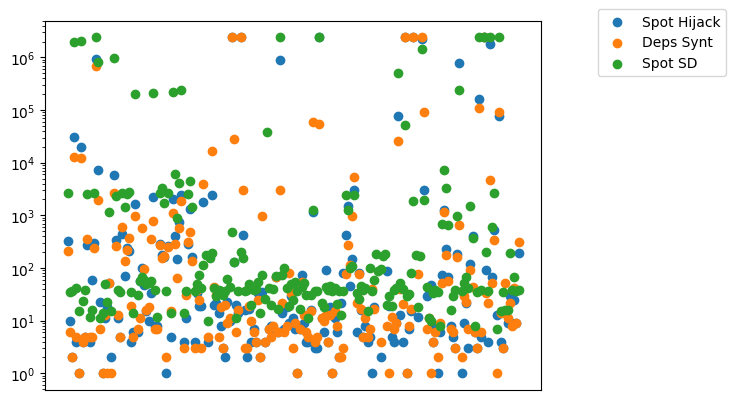

In [28]:
total_time_df = all_tools_df[['name', 'duration_spot_sd', 'duration_deps_synt', 'duration_spot_hijack']]

fig, ax = plt.subplots()
ax.scatter(total_time_df["name"], total_time_df['duration_spot_hijack'], label="Spot Hijack")
ax.scatter(total_time_df["name"], total_time_df['duration_deps_synt'], label="Deps Synt")
ax.scatter(total_time_df["name"], total_time_df['duration_spot_sd'], label="Spot SD")
ax.set_xticks([])
ax.set_yscale("log")
ax.legend(bbox_to_anchor=(1.1, 1.05));

### Full Specification vs Independent Specification 
How much synthesis independent only improved the process?

I.e., how much is synthesis the specificaiton with independent variables is better than synthesis the full specficiation?